<h1> Importing Necessary Packages</h1>

In [230]:
# Transforming categorical data to numerical
from sklearn.preprocessing import LabelEncoder
# Split data
from sklearn.model_selection import train_test_split

#Data manupilating
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<h1> Data Loading</h1>

In [349]:
#Airports list
airports = pd.read_csv('airports.csv')
#Lease Costs
airports_lease = pd.read_csv('airports_terms_of_lease.csv')
#Europe passengers
passengers_eu = pd.read_csv('passengersEU.csv')
#WorldWide passengers
passengers_www = pd.read_csv('passengersWW.csv')

<h1> Data Preprocessing </h1>

In [283]:
# Missing data
total = passengers_eu.isnull().sum().sort_values(ascending=False)
percent = (passengers_eu.isnull().sum()/passengers_eu.isnull().count()).sort_values(ascending=False)

missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
departure_IATA_2,100324,0.758685
destination_IATA_2,92268,0.697763
flight_number_2,92268,0.697763
luggage,0,0.000000
sex,0,0.000000
age,0,0.000000
shopped_at,0,0.000000
business_trip,0,0.000000
traveled_with_family,0,0.000000
total_traveltime,0,0.000000


<h5>Transforming strings to numerical data</h5>

In [350]:
passengers_eu.business_trip.replace(to_replace=['no', 'yes'], value=[0, 1],inplace=True)
passengers_eu.traveled_with_family.replace(to_replace=['no', 'yes'], value=[0, 1],inplace=True)

In [351]:
passengers_eu.sex.replace(to_replace=['m', 'f'], value=[0, 1],inplace=True)

<h5>Filling missing values with most frequent</h5>


In [352]:
#Filling with the most frequent value
passengers_eu['departure_IATA_1'] = passengers_eu.departure_IATA_1.fillna(passengers_eu.departure_IATA_1.mode().iloc[0])
passengers_eu['destination_IATA_1'] = passengers_eu.destination_IATA_1.fillna(passengers_eu.destination_IATA_1.mode().iloc[0])

In [354]:
# Flight number 2 has many missing values so we work on flight_number_1
passengers_eu['Flight_Company'] = passengers_eu['flight_number_1'].apply(lambda x: x.split(' ')[0])

In [353]:
passengers_eu['birth_date'] = pd.to_datetime(passengers_eu['birth_date'])
passengers_eu["age"] = passengers_eu["birth_date"].apply(lambda x : (pd.datetime.now().year - x.year))
passengers_eu.drop(columns=['birth_date'], inplace=True)
cols = passengers_eu.columns.tolist()
cols.insert(2,cols[-1])

passengers_eu = passengers_eu[cols[:-1]]

<h3>Influence of Gender, Age and Layover Time on the amount spent in the retail markets</h3>

In [237]:
passengers_eu.groupby('sex').amount_spent_cat.value_counts()

sex  amount_spent_cat
0    0                   19731
     2                   15737
     1                   11361
     3                   11253
     4                    8214
1    0                   19439
     2                   15707
     1                   11480
     3                   11131
     4                    8181
Name: amount_spent_cat, dtype: int64

<Figure size 2160x720 with 0 Axes>

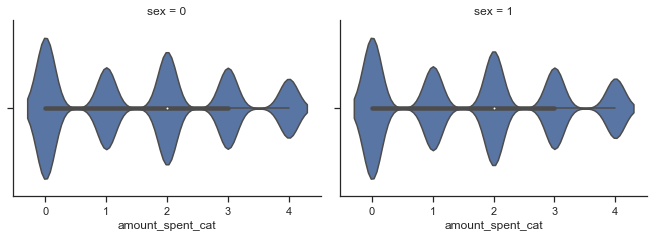

In [238]:
plt.figure(figsize=(30, 10))
with sns.axes_style(style='ticks'):
    sns.catplot("amount_spent_cat", col="sex", col_wrap=2, data=passengers_eu, kind="violin", height=3.27, aspect=11.7/8.27)


Both genders have the same pattern when it comes to spending money on shopping in retail markets.

In [239]:
#age = passengers_eu[['age','amount_spent_cat']].sort_values(by='amount_spent_cat', ascending= False)

<h5>Anomaly detection</h5>

In [240]:
def anomaly_detection(variable):
    # histogram and kernel density estimation function of the variable height
    ax = sns.distplot(passengers_eu[variable], hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

    # notation indicating a possible outlier
    ax.annotate('Possible outlier', xy=(188,0.0030), xytext=(189,0.0070), fontsize=12,
                arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

    # ticks 
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # labels and title
    plt.xlabel(str(variable), fontsize=14)
    plt.ylabel('frequency', fontsize=14)
    #plt.title('Distribution of Age', fontsize=20);

<Figure size 1440x432 with 0 Axes>

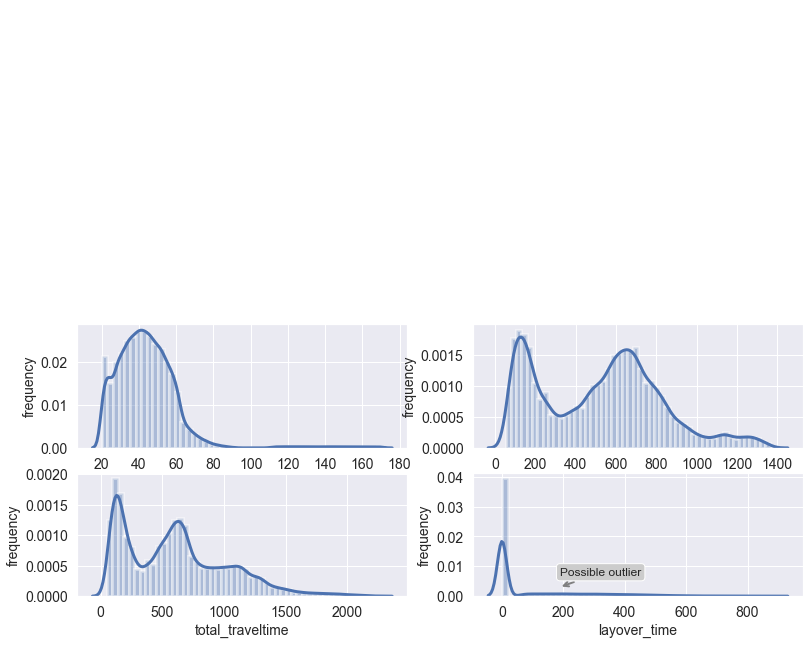

<Figure size 1440x432 with 0 Axes>

In [243]:
plt.figure(figsize=(20, 6))

features = ['age','total_flighttime','total_traveltime','layover_time']
plt.figure(2)
for i in range(4):
    plt.subplot(2, 2, i+1)
    anomaly_detection(features[i])
plt.figure(figsize=(20, 6))


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=2.3, hspace=0.7)
plt.rcParams['figure.figsize'] = (13, 5)

plt.show()

In [21]:
passengers_eu[['name','sex','age','amount_spent_cat']][passengers_eu.age>100]

,name,sex,age,amount_spent_cat
101,Inaaya Baqat,m,149,0
204,Palomares Aleksiev,f,128,3
206,Christian Muller,m,116,2
287,Charlsie Wojtowich,f,123,1
381,Marta noemi Ojanguren,f,144,4
...,...,...,...,...
131759,Manuela Gloeckner,f,131,0
131945,Carlo Temples,m,151,0
131969,Ricardo cesar Playa,m,138,3
131986,Marvin Warford,m,125,0


Text(0.5, 1.0, 'Distribution of age')

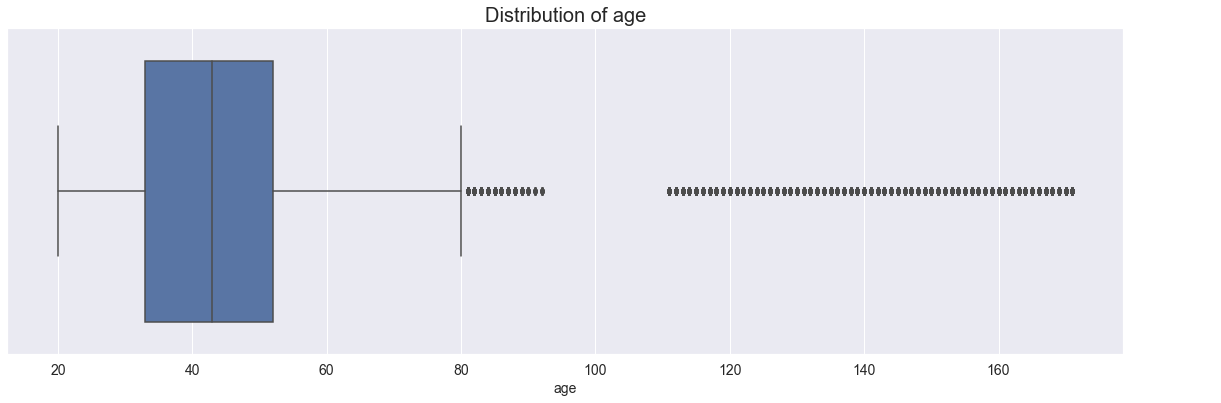

In [244]:
# box plot of the variable age
plt.figure(figsize=(20, 6))
ax = sns.boxplot(passengers_eu.age)

# notation indicating an outlier
ax.annotate('Outlier', xy=(190,0), xytext=(186,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('age', fontsize=14)
plt.title('Distribution of age', fontsize=20)

In [262]:
#passengers_eu[(passengers_eu['layover_time'] >300) & (passengers_eu['layover_time'] < 400)]

#passengers_eu.luggage.apply(lambda x: x.split(' ')[1])

In [27]:
percent = (len(passengers_eu['age'][passengers_eu.age>90])) / (len(passengers_eu['age'])) * 100
print('Percentage of outliers in the age column:',np.round(percent,2),'%')

Percentage of outliers in the age column: 1.55 %


In [316]:
passengers_eu = passengers_eu[passengers_eu.age < 90]

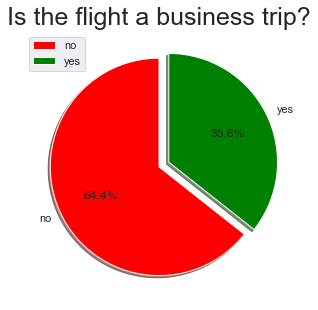

In [280]:
# plotting a pie chart to represent the share of flight information

labels = ['no','yes'] 
size = passengers_eu['business_trip'].value_counts()
colors = ['red', 'green']
explode = [0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90, autopct='%.1f%%')
plt.title('Is the flight a business trip?', fontsize = 25)
plt.legend()
plt.show()

<h5> Extracting the Flight Company for each trip </h5>

In [31]:
without_layover = passengers_eu[passengers_eu['layover_time'] == 0.0]
with_layover = passengers_eu[passengers_eu['layover_time'] != 0.0]

<b>Relationship between trip type and the spent amount

Text(0.5, 1.0, 'Expenditure Catrgory of passengers who made a layover')

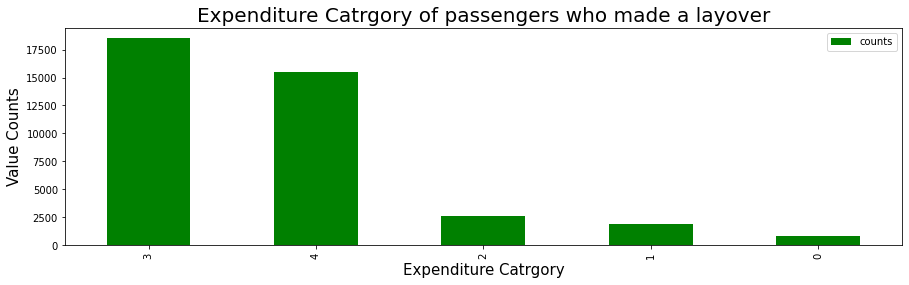

In [32]:
ax = with_layover['amount_spent_cat'].value_counts().sort_values(ascending=False).reset_index().rename(
    columns ={'index':'amount','amount_spent_cat':'counts'}).plot(
    kind='bar',x='amount',y='counts',figsize=(15,4), color='green')
ax.set_xlabel('Expenditure Catrgory',fontsize=15)
ax.set_ylabel('Value Counts',fontsize=15)
ax.set_title('Expenditure Catrgory of passengers who made a layover',fontsize=20)

Text(0.5, 1.0, 'Expenditure Catrgory of passengers without layover')

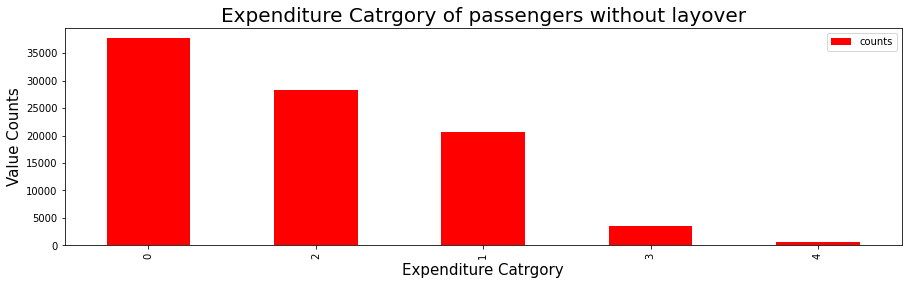

In [33]:
ax = without_layover['amount_spent_cat'].value_counts().sort_values(ascending=False).reset_index().rename(
    columns ={'index':'amount','amount_spent_cat':'counts'}).plot(
    kind='bar',x='amount',y='counts',figsize=(15,4), color='red')
ax.set_xlabel('Expenditure Catrgory',fontsize=15)
ax.set_ylabel('Value Counts',fontsize=15)
ax.set_title('Expenditure Catrgory of passengers without layover',fontsize=20)

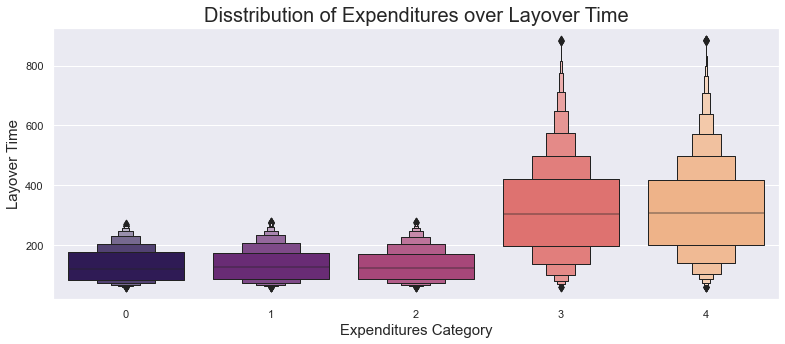

In [282]:
# Distrubtion of expenditures over layover time

cat = (4,3,2,1,0)

data_2 = passengers_eu.loc[passengers_eu['amount_spent_cat'].isin(cat) & passengers_eu['layover_time']]

plt.rcParams['figure.figsize'] = (13, 5)
ax = sns.boxenplot(x = 'amount_spent_cat', y = 'layover_time', data = data_2, palette = 'magma')
ax.set_xlabel(xlabel = 'Expenditures Category', fontsize = 15)
ax.set_ylabel(ylabel = 'Layover Time', fontsize = 15)
ax.set_title(label = 'Disstribution of Expenditures over Layover Time', fontsize = 20)
plt.xticks()
plt.show()

<h3>What is the minimum value of the layover time from which the passengers expenditures become within the 3rd and 4th categories?</h3>

In [35]:
#initial value
i = 100

while (i < passengers_eu['layover_time'].max()):
    df2 = passengers_eu[['amount_spent_cat','luggage','layover_time']][passengers_eu.layover_time > i]
    if df2.nunique()[0] == 2:
        print(i)
        break
    i+=1

279


<p> People who made a layover duration longer than 279min have the tendency to spend more money in retail markets </p>

Text(0.5, 1.0, 'Layover Time vs Expenditure and Luggage')

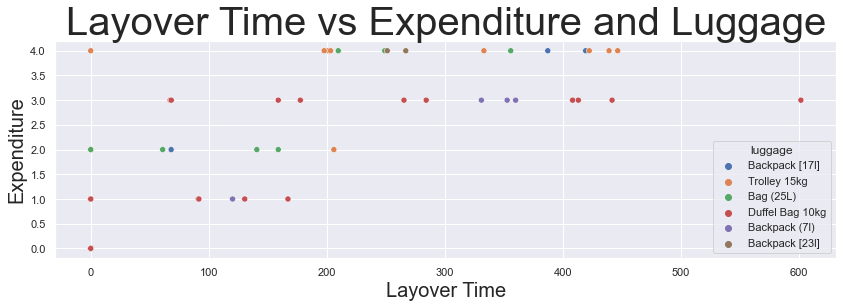

In [297]:
import random
#figure parameters
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1,1,figsize=(14,4))


df2 = passengers_eu[['amount_spent_cat','luggage','layover_time']][passengers_eu.luggage.isin(random.sample(list(passengers_eu.luggage.unique()),6))][:100]
ax = sns.scatterplot(x="layover_time", y="amount_spent_cat", hue='luggage',
             data=df2,color='red')
ax.set_xlabel('Layover Time', fontsize=20)
ax.set_ylabel('Expenditure', fontsize=20)
ax.set_title('Layover Time vs Expenditure and Luggage', fontsize=40)

An increase in the layover time results in a sharp increae in the luggage size which is firmly related to the expenditures.
We can notice that during a layover period between 400-600min, people are most likely to spend more money in retail markets.

In [82]:
def count_values(amount_spent,column_name):
    df_temp = passengers_eu[[str(column_name),'amount_spent_cat']][passengers_eu.amount_spent_cat == amount_spent]
    
    
    
    df_temp[str(column_name)+'_Counts'] = df_temp.groupby([str(column_name)])['amount_spent_cat'].transform('count')
    
    return df_temp[[str(column_name),str(column_name)+'_Counts']]

In [ ]:
column_name = str(input('Enter Column:'))
amount = int(input('Enter Value:'))
count_values(amount,str(column_name)).sort_values(by=str(column_name)+'_Counts', ascending = False)

This function counts unique values based on specified column and expenditure. It helps in making group categories.

In [325]:
count_values(4,'total_flighttime')

,total_flighttime,total_flighttime_Counts
54093,854.77,15
121705,854.77,15
88360,854.77,15
106578,854.77,15
37950,854.77,15
...,...,...
109467,1262.57,1
109481,953.20,1
36718,1214.92,1
48664,1167.22,1


Text(0.5, 1.0, 'Used Luggage Counts in the 4th Category')

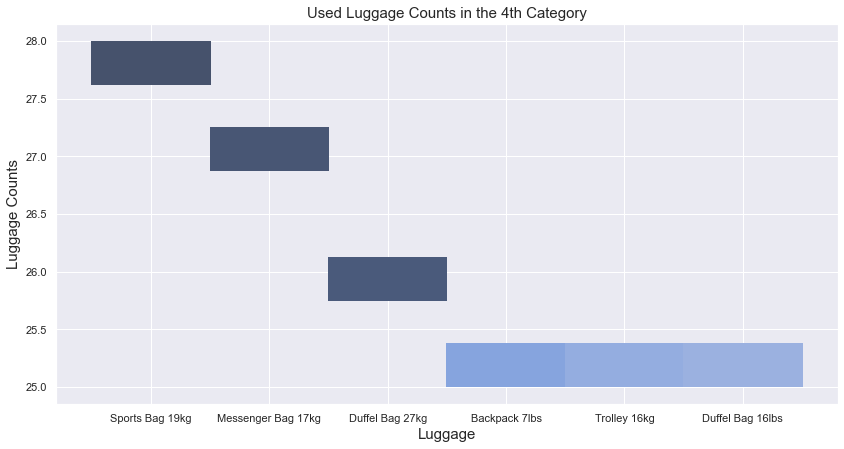

In [42]:
# Open
fig, (axis1) = plt.subplots(1,1,figsize=(14,7))
ax = sns.histplot(x='luggage',y='luggage_Counts', 
              data=count_values(4,'luggage').sort_values(by='luggage_Counts',ascending =False).iloc[:100]
              ,palette="hot", ax=axis1)
ax.set_xlabel('Luggage', fontsize=15)
ax.set_ylabel('Luggage Counts', fontsize=15)
ax.set_title('Used Luggage Counts in the 4th Category', fontsize=15)

In [84]:
passengers_eu['layover_time'][passengers_eu.luggage =='Sports Bag 19kg'].value_counts().reset_index().rename(columns={'index':'layover_time','layover_time':'counts'}).iloc[0]

layover_time     0.0
counts          24.0
Name: 0, dtype: float64

In [85]:
passengers_eu['layover_time'][passengers_eu.luggage =='Messenger Bag 17kg'].value_counts().reset_index().rename(columns={'index':'layover_time','layover_time':'counts'}).iloc[0]

layover_time     0.0
counts          34.0
Name: 0, dtype: float64

Most of the passengers who carried sports Bag made a direct flight yet ended up with the highest expenditure.
Where did they spend money the most?

In [86]:
passengers_eu[['shopped_at','Flight_Company','departure_IATA_1','layover_time','destination_IATA_1','destination_IATA_2']][(passengers_eu.amount_spent_cat == 4) & (passengers_eu.luggage == 'Sports Bag 19kg')].head(5)

,shopped_at,Flight_Company,departure_IATA_1,layover_time,destination_IATA_1,destination_IATA_2
2911,CPH,WY,GVA,183.05,CPH,SIN
3683,CPH,AY,NAS,264.02,PMI,LXR
8397,DUB,MH,SAN,330.17,DUB,BEG
14890,PMI,NZ,BUF,252.75,PMI,KBP
15316,LHR,NAX,DRS,242.90,PMI,DEN


<AxesSubplot:>

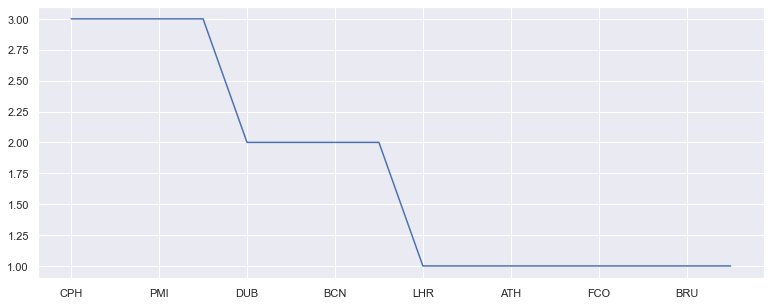

In [87]:
passengers_eu[['shopped_at','Flight_Company','departure_IATA_1','layover_time','destination_IATA_1','destination_IATA_2']][(passengers_eu.amount_spent_cat == 4) & (passengers_eu.luggage == 'Sports Bag 19kg')]['shopped_at'].value_counts().plot()

In [88]:
frame = passengers_eu[['shopped_at','Flight_Company','departure_IATA_1','layover_time','destination_IATA_1','destination_IATA_2']][(passengers_eu.amount_spent_cat == 4) & (passengers_eu.luggage == 'Sports Bag 19kg')]

In [89]:
frame.shopped_at.value_counts()

CPH    3
HEL    3
PMI    3
FRA    3
DUB    2
CDG    2
BCN    2
MAN    2
LHR    1
MXP    1
ATH    1
MUC    1
FCO    1
ARN    1
BRU    1
TXL    1
Name: shopped_at, dtype: int64

<AxesSubplot:>

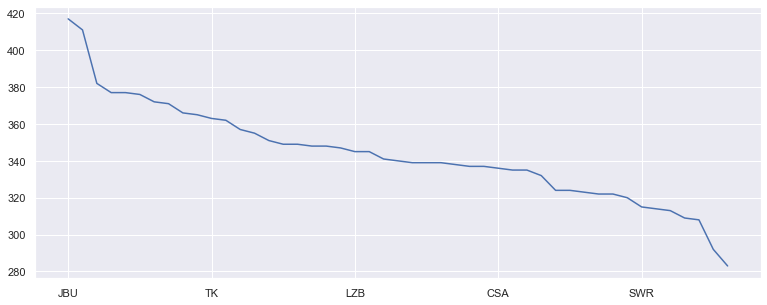

In [90]:
passengers_eu[['shopped_at','Flight_Company','departure_IATA_1','layover_time','destination_IATA_1','destination_IATA_2']][(passengers_eu.amount_spent_cat == 4)]['Flight_Company'].value_counts().plot()

4th category: Direct Flight + Sports Bag + Mainly JetBlue and Turkish airlines

<h2>Modeling</h2>

Training and testing

First label encode the categorical features, and while just use all features given in the dataset without further enginerring.

In [355]:
df = passengers_eu.copy()

In [356]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['luggage_labeled'] = LE.fit_transform(df['luggage'])
df['Flight_Company_labeled'] = LE.fit_transform(df['Flight_Company'])
df['departure_IATA_1_labeled'] = LE.fit_transform(df['departure_IATA_1'])
df['destination_IATA_1_labeled'] = LE.fit_transform(df['destination_IATA_1'])
df['shopped_at_labeled'] = LE.fit_transform(df['shopped_at'])

In [358]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X = df[['sex','age','shopped_at_labeled', 'business_trip',
       'traveled_with_family', 'luggage_labeled',
        'layover_time','departure_IATA_1_labeled', 'destination_IATA_1_labeled',
        'Flight_Company_labeled']]
y = df['amount_spent_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8675309)

In [360]:
X

,sex,age,shopped_at_labeled,business_trip,traveled_with_family,luggage_labeled,layover_time,departure_IATA_1_labeled,destination_IATA_1_labeled,Flight_Company_labeled
0,0,44,3,1,0,1803,0.00,14,93,25
1,0,50,14,0,0,592,62.48,77,126,6
2,0,37,11,0,0,1370,0.00,75,116,45
3,0,48,20,0,0,577,0.00,179,107,27
4,0,36,10,1,0,520,458.08,190,144,10
...,...,...,...,...,...,...,...,...,...,...
132229,1,31,5,0,1,1742,0.00,141,34,17
132230,1,38,14,1,0,656,137.08,124,126,23
132231,1,50,9,0,0,2062,75.18,38,62,7
132232,1,28,14,1,0,542,0.00,126,144,25


In [359]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [361]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[8593,  400,  680,  234,    8],
       [ 342, 4180,  594,  483,   54],
       [ 630,  665, 5442,  624,  502],
       [ 227,  461,  580, 4124,  205],
       [  15,   39,  443,  229, 3305]])

In [362]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      9915
           1       0.73      0.74      0.73      5653
           2       0.70      0.69      0.70      7863
           3       0.72      0.74      0.73      5597
           4       0.81      0.82      0.82      4031

    accuracy                           0.78     33059
   macro avg       0.77      0.77      0.77     33059
weighted avg       0.78      0.78      0.78     33059



<h1>Applying on World Wide Data + Ranking Airports</h1>

In [363]:
data = passengers_www
data.business_trip.replace(to_replace=['no', 'yes'], value=[0, 1],inplace=True)
data.traveled_with_family.replace(to_replace=['no', 'yes'], value=[0, 1],inplace=True)
data.sex.replace(to_replace=['m', 'f'], value=[0, 1],inplace=True)
data['birth_date'] = pd.to_datetime(data['birth_date'])
data["age"] = data["birth_date"].apply(lambda x : (pd.datetime.now().year - x.year))
data.drop(columns=['birth_date'], inplace=True)
cols = data.columns.tolist()
cols.insert(2,cols[-1])
data = data[cols[:-1]]
data['Flight_Company'] = data['flight_number_1'].apply(lambda x: x.split(' ')[0])
data['departure_IATA_1'] = data.departure_IATA_1.fillna(data.departure_IATA_1.mode().iloc[0])
data['destination_IATA_1'] = data.destination_IATA_1.fillna(data.destination_IATA_1.mode().iloc[0])

In [364]:
LE = LabelEncoder()
data['luggage_labeled'] = LE.fit_transform(data['luggage'])
data['Flight_Company_labeled'] = LE.fit_transform(data['Flight_Company'])
data['departure_IATA_1_labeled'] = LE.fit_transform(data['departure_IATA_1'])
data['destination_IATA_1_labeled'] = LE.fit_transform(data['destination_IATA_1'])
data['shopped_at_labeled'] = LE.fit_transform(data['shopped_at'])
X = data[['sex','age','shopped_at_labeled', 'business_trip',
       'traveled_with_family', 'luggage_labeled',
        'layover_time','departure_IATA_1_labeled', 'destination_IATA_1_labeled',
        'Flight_Company_labeled']]

In [365]:
preds = dt.predict(X)

In [366]:
X['decoded_shopped_at'] = LE.inverse_transform(X['shopped_at_labeled'])
X['predicted_amount'] = preds

In [367]:
X['decoded_shopped_at'][X.predicted_amount == 4].value_counts()

HND    1318
HKG    1208
KUL    1116
JFK     760
DXB     737
DFW     734
PEK     719
SFO     714
PVG     638
SIN     571
EZE     215
MEL     179
Name: decoded_shopped_at, dtype: int64

In [368]:
frame = pd.DataFrame(X['decoded_shopped_at'][X.predicted_amount == 4].value_counts()).reset_index().rename(columns={'index':'airport','decoded_shopped_at':'counts'})

In [369]:
frame

,airport,counts
0,HND,1318
1,HKG,1208
2,KUL,1116
3,JFK,760
4,DXB,737
5,DFW,734
6,PEK,719
7,SFO,714
8,PVG,638
9,SIN,571


<AxesSubplot:xlabel='airport', ylabel='counts'>

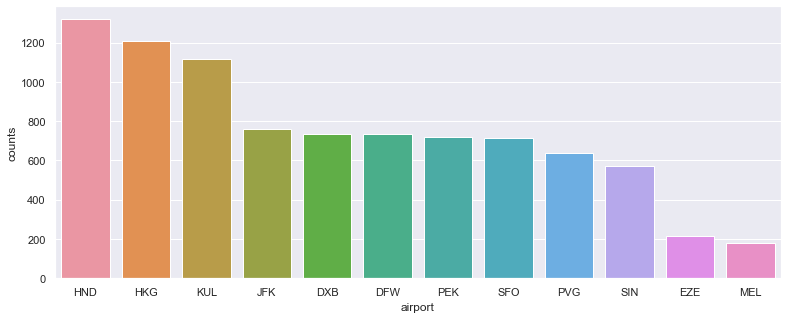

In [370]:
sns.barplot(x="airport", y ='counts' ,data=frame)

In [371]:
airports_lease = np.array(airports_lease)

In [372]:
names = []
values = []
for airport in airports_lease:
    for x in airport:
        names.append(x.split(',')[0])
        values.append(x.split(',')[2])
lease = pd.DataFrame()
lease['airport'] = names
lease['cost'] = values
lease['cost'] = pd.to_numeric(lease.cost)

<AxesSubplot:xlabel='airport', ylabel='cost'>

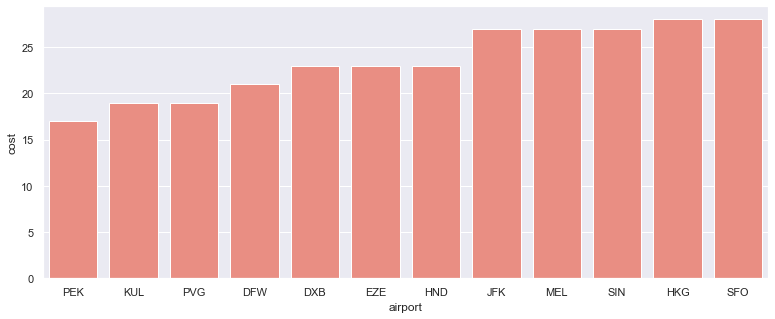

In [373]:
sorted_ = lease.sort_values(by='cost', ascending=True)
sns.barplot(x="airport", y ='cost' ,color='salmon',data=sorted_)

<b>A suggested ranking:</b>
    <ul>
    <li>Kuala Lumpur International Airport</li>
    <li>Beijing Capital International Airport</li>
    <li>Dallas/Fort Worth International Airport</li>
    <li>John F. Kennedy International Airport</li>
    </ul>
<h3> Criteria: Profit & leasing costs comparison</h3>